# Introduction

Look at cubes consisting of images of tissue composed of 256 $\times$ 256 pixels, in each of which an infra-red (IR) spectrum with 754 wavenumbers is recorded. The tissue in some of the pixels is cancerous. Try and identify differences between this and normal tissue.

## The usual import statements

In [1]:
import datetime
now = datetime.datetime.now()
nb_start = now
print("Date and time ",str(now))
#
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

Date and time  2023-03-10 14:01:26.909556
 
Date and time 2023-03-10 14:01:27.495735
Time since last check is 0:00:00.586179


## Load wavenumbers and A datacube

You will need to enter the directory name in the cell below. What this is will depend on where you choose to store the datacube, wavenumbers and annotation (histology information) on your computers!

In [2]:
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
#
# Put in the relevant directory name!
directory = r"C:/Users/name/folder01/folder02.../Phys205-2022-FTIR-Data/"
wavenumbers = np.load(directory + "wavenumbers.npy")[0]
n_ks = wavenumbers.shape[0]
A_cube = np.load(directory + "A12_cube.npy")
print("A data cube shape",A_cube.shape)
n_rgb = A_cube.shape[2] - n_ks
print("Wavenember array shape",wavenumbers.shape)
print(f"First wavenumber = {wavenumbers[0]:.1f}.")
print(f"Last wavenumber = {wavenumbers[n_ks - 1]:.1f}.")
print(f"Wavenumber step size = {wavenumbers[1] - wavenumbers[0] :.3f}.")
print("Number of 'key' wavenumbers",n_ks)
print("Number of optical channels",n_rgb)
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

Date and time  2023-03-10 14:01:30.846860
A data cube shape (256, 256, 756)
Wavenember array shape (753,)
First wavenumber = 898.7.
Last wavenumber = 3799.1.
Wavenumber step size = 3.857.
Number of 'key' wavenumbers 753
Number of optical channels 3
 
Date and time 2023-03-10 14:01:31.064510
Time since last check is 0:00:00.217650


## Plot the A datacube as a set of images

Date and time  2023-03-10 14:02:18.295779
 


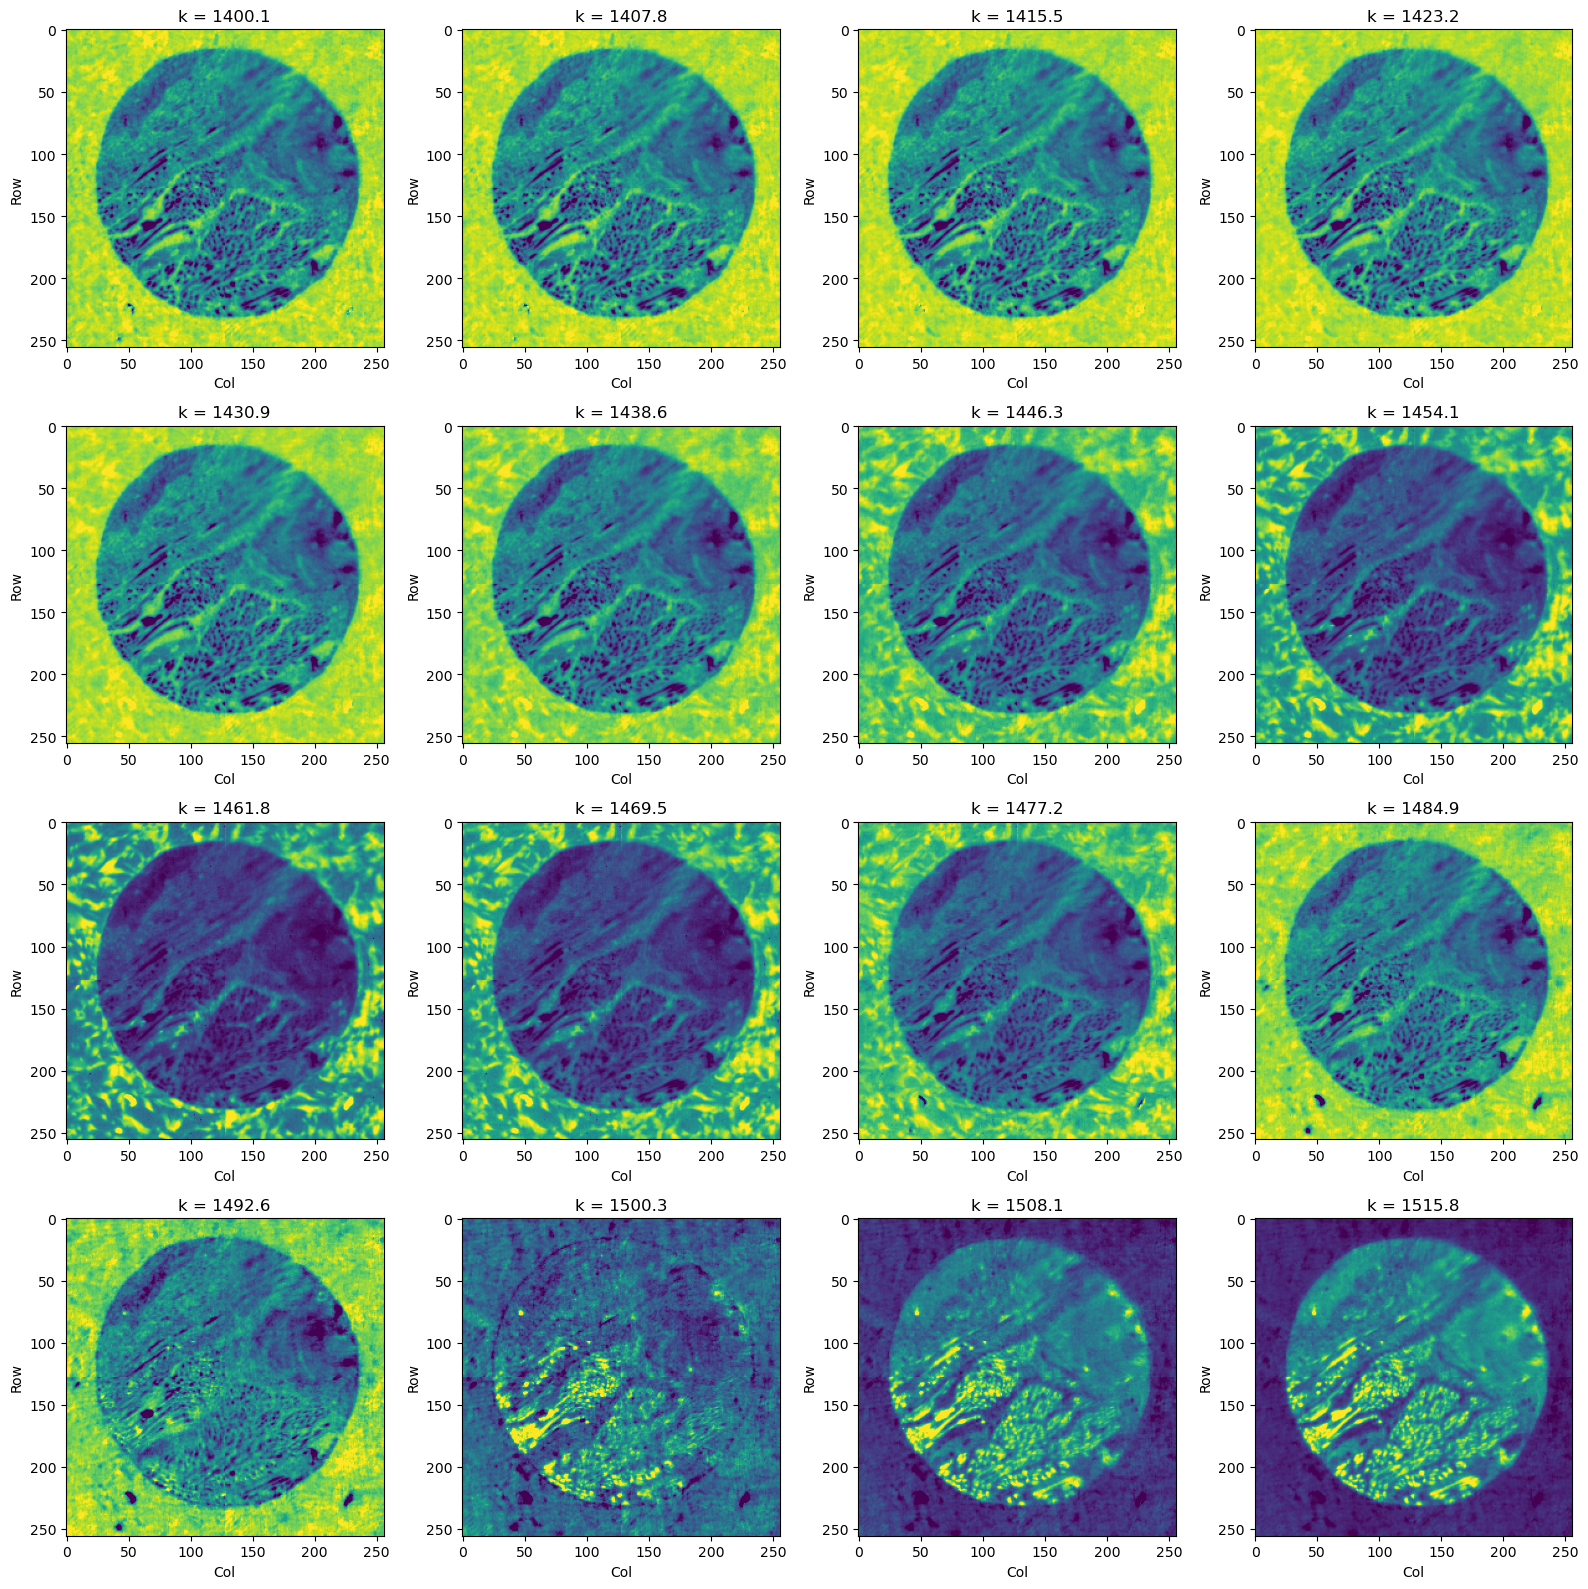

 
Date and time 2023-03-10 14:02:22.264124
Time since last check is 0:00:03.968345


In [3]:
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
#
use_global_v = False
#
# Wavenumber range to plot 
k_min = 1400.0
k_max = 1500.0
#
# Indices of wavenumbers in wavenumbers array
k_ind_min = np.where(np.abs(wavenumbers - k_min) < 2.0)[0][0].astype(int)
k_ind_max = np.where(np.abs(wavenumbers - k_max) < 2.0)[0][0].astype(int)
#
# Step length (indices) for plots
k_ind_step = 2
n_plots = (k_ind_max - k_ind_min)//k_ind_step
n_cols_plot = 4
n_rows_plot = n_plots//n_cols_plot + (n_plots%n_cols_plot > 0)
#
print(" ")
fig, ax = plt.subplots(n_rows_plot, n_cols_plot, figsize = (4*n_cols_plot, 4*n_rows_plot))
#
q_min = 0.01
q_max = 0.99
if use_global_v:
    v_min = np.quantile(A_cube[im_mask_A, k_ind_min:k_ind_max], q_min)
    v_min = np.quantile(A_cube[im_mask_A, k_ind_min:k_ind_max], q_max)
#
k_ind = k_ind_min
if n_rows_plot > 1:
    for row in range(0, n_rows_plot):
        for col in range(0, n_cols_plot):
            if not use_global_v:
                v_min = np.quantile(A_cube[:, :, k_ind], q_min)
                v_max = np.quantile(A_cube[:, :, k_ind], q_max)
            ax[row, col].imshow(A_cube[:, :, k_ind], cmap = 'viridis', vmin = v_min, vmax = v_max)
            ax[row, col].set_title(f"k = {wavenumbers[k_ind]:.1f}")
            ax[row, col].set_xlabel("Col")
            ax[row, col].set_ylabel("Row")
            k_ind += k_ind_step
else:
    for col in range(0, n_cols_plot):
        if not use_global_v:
            v_min = np.quantile(A_cube[:, :, k_ind], q_min)
            v_max = np.quantile(A_cube[:, :, k_ind], q_max)
        ax[col].imshow(A_cube[:, :, k_ind], cmap = 'viridis', vmin = v_min, vmax = v_max)
        ax[col].set_title(f"k = {wavenumbers[k_ind]:.1f}")
        ax[col].set_xlabel("Col")
        ax[col].set_ylabel("Row")
        k_ind += k_ind_step
    #
plt.tight_layout()
plt.show()
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

## Create image region A and paraffin mask

Date and time  2023-03-10 13:56:26.681082


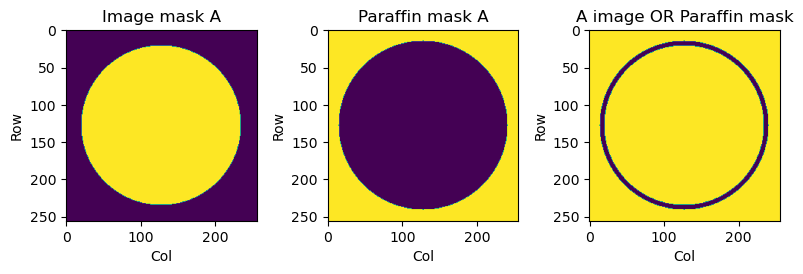

 
Date and time 2023-03-10 13:56:27.073366
Time since last check is 0:00:00.392284


In [4]:
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
#
n_rows = A_cube.shape[0]
n_cols = A_cube.shape[1]
n_pixels = n_rows*n_cols
im_cent_row_A = n_rows/2 - 1
im_cent_col_A = n_cols/2 - 1
#
# Image radius, paraffon radius (both set by hand)
im_rad_A = 107
par_rad_A = 113
#
cols_here = np.linspace(0, n_cols - 1, n_cols)
#
im_mask_A = np.zeros((n_rows, n_cols)).astype(bool)
par_mask_A = np.zeros((n_rows, n_cols)).astype(bool)
#
for r in range(0, n_rows):
    im_mask_A[r, :] = np.sqrt((r - im_cent_row_A)**2 + (cols_here[:] - im_cent_col_A)**2) < im_rad_A
    par_mask_A[r, :] = np.sqrt((r - im_cent_row_A)**2 + (cols_here[:] - im_cent_col_A)**2) > par_rad_A
#
fig, ax = plt.subplots(1, 3, figsize = (8, 3))
ax[0].set_title("Image mask A")
ax[0].imshow(im_mask_A, cmap = 'viridis')
ax[0].set_xlabel("Col")
ax[0].set_ylabel("Row")
#
ax[1].set_title("Paraffin mask A")
ax[1].imshow(par_mask_A, cmap = 'viridis')
ax[1].set_xlabel("Col")
ax[1].set_ylabel("Row")
#
ax[2].set_title("A image OR Paraffin mask")
ax[2].imshow(np.logical_or(im_mask_A, par_mask_A), cmap = 'viridis')
ax[2].set_xlabel("Col")
ax[2].set_ylabel("Row")
#
plt.tight_layout()
plt.show()
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

## Look at the A H&E image

Date and time  2023-03-10 13:56:30.005779
 


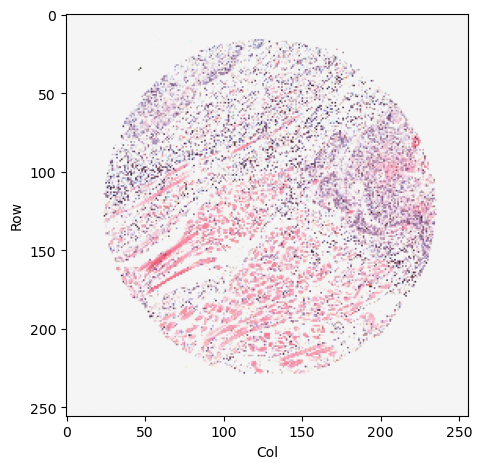

 
Date and time 2023-03-10 13:56:30.200570
Time since last check is 0:00:00.194791


In [5]:
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
#
A_array = A_cube[:, :, n_ks: n_ks + n_rgb]
print(" ")
plt.imshow(A_array)
plt.xlabel("Col")
plt.ylabel("Row")
plt.tight_layout()
plt.show()
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

## Look at the A mask

Date and time  2023-03-10 13:56:31.931143
 
A mask shape (256, 256)
Number of pixels in A mask 6208
 


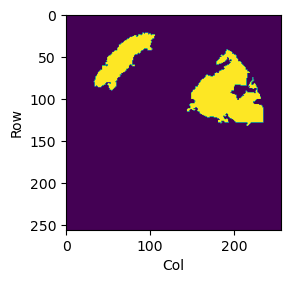

 
Date and time 2023-03-10 13:56:32.049793
Time since last check is 0:00:00.118650


In [6]:
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
#
from PIL import Image
#
use_new_mask = False
if use_new_mask:
    A_mask = np.load(directory + 'A12_new_mask.npy')
else:
    A_ann = Image.open(directory + 'A12_annotation.png')
    A_mask = (np.sum(np.array(A_ann), axis = 2) > 255).astype(bool)
#
print(" ")
print("A mask shape",A_mask.shape)
print("Number of pixels in A mask",np.sum(A_mask))
print(" ")
plt.figure(figsize = (3, 3))
plt.xlabel("Col")
plt.ylabel("Row")
plt.imshow(A_mask)
plt.tight_layout()
plt.show()
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

## First thing to try

Use the mask to select the regions of the image that are cancerous and normal. Make an average IR spectrum of the cancerous and the normal tissue. Plot these on a graph. Are there any significant differences?